<h1>Study on Covid-19 in Brazil</h1>
<b>Éverton Bin</b><br>
<b>June, 2020</b>

<h2>Table of Contents</h2>
<ol>
    <a href = '#intro'><li><b>Introduction</b></li></a>
    <a href = '#load'><li><b>Loading Data</b></li></a>
    <a href = '#analysis'><li><b>Exploratory Analysis</b></li></a>
    <a href = '#model'><li><b>Building the Predictive Models</b></a>
        <ol>
            <a href = '#spmodel'><li><b>Regression Models: São Paulo - SP</b></li></a>
            <a href = '#rjmodel'><li><b>Regression Models: Rio de Janeiro - RJ</b></li></a>
            <a href = '#blmodel'><li><b>Regression Models: Belém - PA</b></li></a>
            <a href = '#pamodel'><li><b>Regression Models: Porto Alegre - RS</b></li></a>
        </ol>
    <a href = '#pred'><li><b>Predictions</b></li></a>
        <ol>
            <a href = '#sppred'><li><b>Predicting Deaths in São Paulo - SP</b></li></a>
            <a href = '#rjpred'><li><b>Predicting Deaths in Rio de Janeiro - RJ</b></li></a>
            <a href = '#blpred'><li><b>Predicting Deaths in Belém - PA</b></li></a>
            <a href = '#papred'><li><b>Predicting Deaths in Porto Alegre - RS</b></li></a>
        </ol>
     <a href = '#conc'><li><b>Conclusion</b></li></a>
</ol>

<h2 id = intro>1- Introduction</h2>

<p>
    The purpose of this study is to analyze the data on the Covid-19 pandemic in Brazil, especially in some of the main Brazilian cities. The data used in this report is available on Kaggle webpage and can be accessed by the following link: <a href = "https://www.kaggle.com/unanimad/corona-virus-brazil/data?select=brazil_population_2019.csv"> Coronavirus - Brazil </a>. After this brief analysis, the purpose is to develop a regression model capable of predicting the number of deaths caused by the virus on future dates.
</p>
<p>
    The reference file for this study, "brazil_covid19_cities.csv", presents the following data regarding the pandemic in Brazil:
    <li><i>date</i>: date of confirmation of cases;</li>
    <li><i>state</i>: Brazilian state of reference;</li>
    <li><i>name</i>: city's name of reference;</li>
    <li><i>code</i>: city's code;</li>
    <li><i>cases</i>: number of Covid-19 confirmed cases ;</li>
    <li><i>deaths</i>: accumulated number of deaths caused by Covid-19.</li>
</p>
<p>
    This data set will be analyzed in conjunction with another data set called "brazil_population_2019.csv", also availabe on the web page mentioned above, so the Covid-19 cases situation can be assessed in proportion to each city's population.
</p>

<h2 id = load>2- Loading Data</h2>

In [1]:
# Loading packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading files:
covid_br = pd.read_csv('brazil_covid19_cities.csv', parse_dates = ['date'])
cities_pop = pd.read_csv('brazil_population_2019.csv')

In [3]:
# Verifying variables' type:
covid_br.dtypes

date      datetime64[ns]
state             object
name              object
code               int64
cases              int64
deaths             int64
dtype: object

In [4]:
# Checking out the first rows:
covid_br.head()

,date,state,name,code,cases,deaths
0,2020-03-28,Acre,Rio Branco,120040,25,0
1,2020-03-28,Alagoas,Maceió,270430,13,0
2,2020-03-28,Alagoas,Porto Real do Colégio,270750,1,0
3,2020-03-28,Amapá,Macapá,160030,4,0
4,2020-03-28,Amazonas,Boca do Acre,130070,1,0


In [5]:
# Replacing the state name by its 'UF':
estado_uf = {'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE',
              'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO', 'Maranhão': 'MA', 'Minas Gerais': 'MG',
              'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Pará': 'PA', 'Paraíba': 'PB', 'Pernambuco': 'PE',
              'Piauí': 'PI', 'Paraná': 'PR', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rondônia': 'RO',
              'Roraima': 'RR', 'Rio Grande do Sul': 'RS', 'Santa Catarina': 'SC', 'Sergipe': 'SE', 'São Paulo': 'SP',
              'Tocantins': 'TO'}

covid_br = covid_br.replace({'state': estado_uf})

# Creating new variable named 'city', joining the city and its 'UF' of reference:
covid_br['city'] = covid_br['name'] + ' - ' + covid_br['state']

# Selecting capitals of the Brazilian states:
capitals = ['Aracaju - SE', 'Belém - PA', 'Belo Horizonte - MG', 'Boa Vista - RR', 'Brasília - DF', 'Campo Grande - MS',
            'Cuiabá - MT', 'Curitiba - PR', 'Florianópolis - SC', 'Fortaleza - CE', 'Goiânia - GO', 'João Pessoa - PB',
            'Macapá - AP', 'Maceió - AL', 'Manaus - AM', 'Natal - RN', 'Palmas - TO', 'Porto Alegre - RS',
            'Porto Velho - RO', 'Recife - PE', 'Rio Branco - AC', 'Rio de Janeiro - RJ', 'Salvador - BA', 'São Luís - MA',
            'São Paulo - SP', 'Teresina - PI', 'Vitória - ES']

covid_cap_br = covid_br[covid_br.city.isin(capitals)]

# Deleting columns 'state' and 'name' from the dataset:
covid_cap_br = covid_cap_br.drop(columns = ['state', 'name'])

covid_cap_br.head()

,date,code,cases,deaths,city
0,2020-03-28,120040,25,0,Rio Branco - AC
1,2020-03-28,270430,13,0,Maceió - AL
3,2020-03-28,160030,4,0,Macapá - AP
6,2020-03-28,130260,105,0,Manaus - AM
24,2020-03-28,292740,82,0,Salvador - BA


In [6]:
# Including cities' population to the main dataframe:
covid_cap_br = covid_cap_br.rename(columns = {'code' : 'city_code'})
cities_pop = cities_pop[['city_code', 'population']]
covid_cap_br = pd.merge(covid_cap_br, cities_pop, on = 'city_code')
covid_cap_br.head()

,date,city_code,cases,deaths,city,population
0,2020-03-28,120040,25,0,Rio Branco - AC,407319
1,2020-03-29,120040,31,0,Rio Branco - AC,407319
2,2020-03-30,120040,35,0,Rio Branco - AC,407319
3,2020-03-31,120040,34,0,Rio Branco - AC,407319
4,2020-04-01,120040,34,0,Rio Branco - AC,407319


<h2 id = analysis>3- Exploratory Analysis</h2>

<p>
    New columns will be created to represent the number of cases and deaths per 100 thousand inhabitants so that, subsequently, comparisons can be made proportionally to the population number.
</p>

In [7]:
covid_atual = covid_cap_br[covid_cap_br['date'] == max(covid_cap_br['date'])]

covid_atual['cases_rate'] = round(((covid_atual['cases'] / covid_atual['population'])*100000), 1)

covid_atual['deaths_rate'] = round(((covid_atual['deaths'] / covid_atual['population'])*100000), 1)

covid_atual['deaths_prop'] = round(((covid_atual['deaths'] / covid_atual['cases'])*100), 1)

covid_atual.head()

,date,city_code,cases,deaths,city,population,cases_rate,deaths_rate,deaths_prop
73,2020-06-09,120040,4703,160,Rio Branco - AC,407319,1154.6,39.3,3.4
147,2020-06-09,270430,8698,406,Maceió - AL,1018948,853.6,39.8,4.7
221,2020-06-09,160030,5750,170,Macapá - AP,503327,1142.4,33.8,3.0
295,2020-06-09,130260,21605,1501,Manaus - AM,2182763,989.8,68.8,6.9
369,2020-06-09,292740,17224,640,Salvador - BA,2872347,599.6,22.3,3.7


In [8]:
# Creating a generic function to display values in barplots:
def show_values_on_bars(axs, max_value):
    def _show_on_single_plot(ax):
        for b in ax.patches:
            _x = b.get_x() + b.get_width() / 2
            _y = b.get_y() + b.get_height() - (0.05*max_value)
            value = '{:.1f}'.format(b.get_height())
            ax.text(_x, _y, value, ha="center", color = 'k', fontsize = 11) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Creating a generic function to display percentage in barplots:
def show_percentage_on_bars(axs, max_value):
    def _show_on_single_plot(ax):
        for b in ax.patches:
            _x = b.get_x() + b.get_width() / 2
            _y = b.get_y() + b.get_height() - (0.05*max_value)
            value = '{:.1f}'.format(b.get_height())+'%'
            ax.text(_x, _y, value, ha="center", color = 'k', fontsize = 11) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<Figure size 432x288 with 0 Axes>

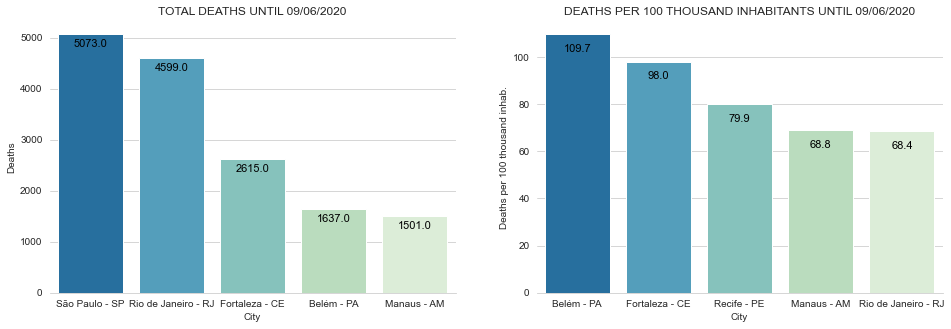

In [9]:
# Ordering data by number of total deaths:
covid_deaths = covid_atual.sort_values(by = ['deaths'], ascending = False)

# Ordering data by number of total deaths per 100 thousand inhabitants:
covid_deaths_rate = covid_atual.sort_values(by = ['deaths_rate'], ascending = False)

# Ordering data by number of confirmed cases per 100 thousand inhabitants:
covid_cases_rate = covid_atual.sort_values(by = ['cases_rate'], ascending = False)

# Creating variables indicating first and last dates presented in the loaded data:
ult_date = max(covid_cap_br['date']).strftime('%d/%m/%Y')
min_date = min(covid_cap_br['date']).strftime('%d/%m/%Y')

# Creating the graphic:
sns.set_style("whitegrid")
sns.despine(left=True)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))

sns.set_style("whitegrid")
sns.despine(left=True)

sns.barplot(x = 'city', y = 'deaths', data = covid_deaths[0:5], ci = None,
            palette = 'GnBu_r', ax = ax[0]).set_title('TOTAL DEATHS UNTIL '+ ult_date)
ax[0].set_xlabel('City')
ax[0].set_ylabel('Deaths')

show_values_on_bars(ax[0],5000)

sns.barplot(x = 'city', y = 'deaths_rate', data = covid_deaths_rate[0:5], ci = None,
            palette = 'GnBu_r', ax = ax[1]).set_title('DEATHS PER 100 THOUSAND INHABITANTS UNTIL '+ ult_date)
ax[1].set_xlabel('City')
ax[1].set_ylabel('Deaths per 100 thousand inhab.')

show_values_on_bars(ax[1],150)

fig.show()

<p>
    Considering as only parameter the total number of deaths so far, <b>São Paulo</b> and <b>Rio de Janeiro</b> are the negative highlights in Brazil, being responsible for the highest number of deaths among all the states' capitals.
</p>
<p>
    However, if we consider the number of the deaths caused by Covid-19 analyzed according to the total population of each city, São Paulo and Rio de Janeiro give place to <b>Belém</b> and <b>Fortaleza</b> as the capitals with the highest number of deaths per 100 thousand inhabitants in Brazil, with <b>Belém</b> surpassing 100 deaths per 100 thousand inhabitants, while <b>Fortaleza</b> follows it closely almost reaching the same mark.
</p>

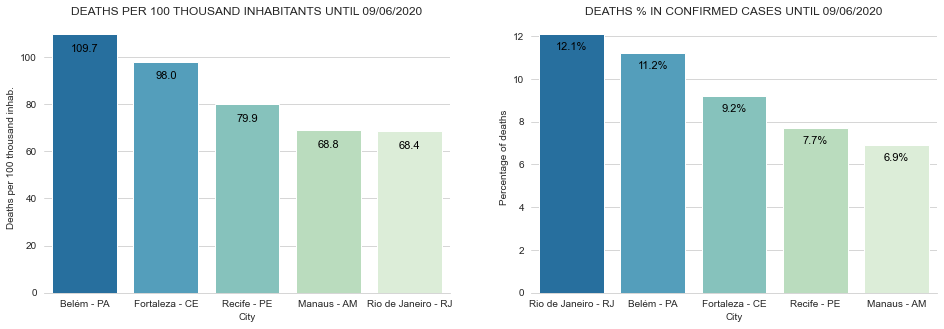

In [10]:
# Ordering data by deaths' percentage in confirmed cases:
covid_deaths_prop = covid_atual.sort_values(by = ['deaths_prop'], ascending = False)

# Creating the graphics:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))

sns.set_style("whitegrid")
sns.despine(left=True)

sns.barplot(x = 'city', y = 'deaths_rate', data = covid_deaths_rate[0:5], ci = None,
            palette = 'GnBu_r', ax = ax[0]).set_title('DEATHS PER 100 THOUSAND INHABITANTS UNTIL '+ ult_date)
ax[0].set_xlabel('City')
ax[0].set_ylabel('Deaths per 100 thousand inhab.')

show_values_on_bars(ax[0],150)

sns.barplot(x = 'city', y = 'deaths_prop', data = covid_deaths_prop[0:5], ci = None,
            palette = 'GnBu_r', ax = ax[1]).set_title('DEATHS % IN CONFIRMED CASES UNTIL '+ ult_date)
ax[1].set_xlabel('City')
ax[1].set_ylabel('Percentage of deaths')

show_percentage_on_bars(ax[1],15)

fig.show()

<p>
    Observing the comparative graphs presented above, it can be seen that other factors, in addition to deaths' proportion relative to the size of the population, seem to affect the death rate among confirmed cases. While <b>Belém</b> is the capital with the highest death rate per 100 thousand inhabitants, <b>Rio de Janeiro</b> is the city that presents the highest deaths' proportion among the confirmed cases, with a rate close to 12%. <b>Belém</b> presents numbers close to Rio de Janeiro's, but slightly lower.
</p>
<p>
    Let's also analyze which are the capitals in the country that pose as positive highlights, observing them by the number of total deaths, deaths per 100 thousand inhabitants and also by the percentage of deaths in confirmed cases:
</p>

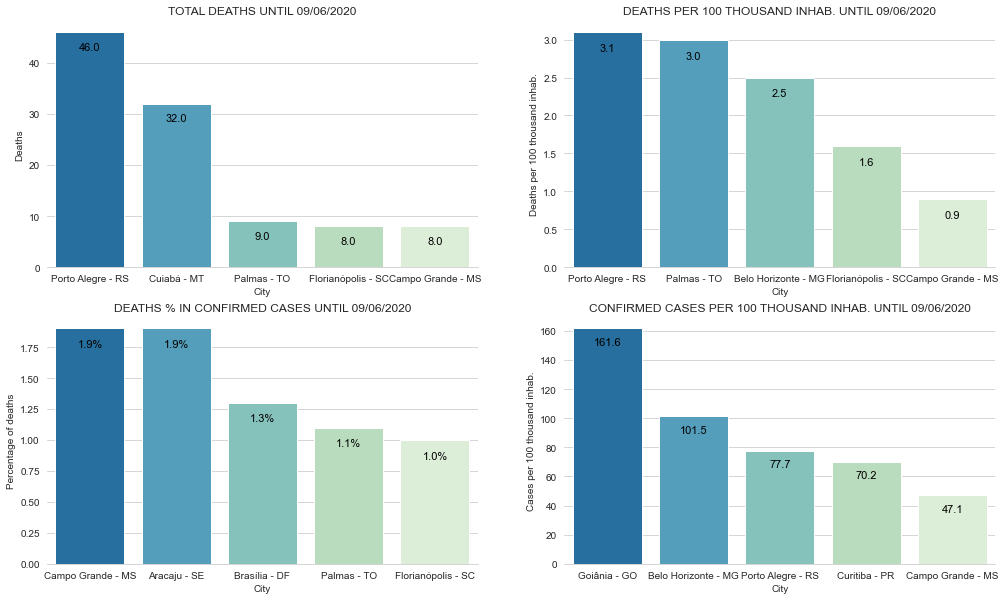

In [11]:
# Creating the graphics:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 10))

sns.set_style("whitegrid")
sns.despine(left=True)

sns.barplot(x = 'city', y = 'deaths', data = covid_deaths[22:], ci = None,
            palette = 'GnBu_r', ax = ax[0,0]).set_title('TOTAL DEATHS UNTIL '+ ult_date)
ax[0,0].set_xlabel('City')
ax[0,0].set_ylabel('Deaths')

show_values_on_bars(ax[0,0],70)

sns.barplot(x = 'city', y = 'deaths_rate', data = covid_deaths_rate[22:], ci = None,
            palette = 'GnBu_r', ax = ax[0,1]).set_title('DEATHS PER 100 THOUSAND INHAB. UNTIL '+ ult_date)
ax[0,1].set_xlabel('City')
ax[0,1].set_ylabel('Deaths per 100 thousand inhab.')

show_values_on_bars(ax[0,1],5)

sns.barplot(x = 'city', y = 'deaths_prop', data = covid_deaths_prop[22:], ci = None,
            palette = 'GnBu_r', ax = ax[1,0]).set_title('DEATHS % IN CONFIRMED CASES UNTIL '+ ult_date)
ax[1,0].set_xlabel('City')
ax[1,0].set_ylabel('Percentage of deaths')

show_percentage_on_bars(ax[1,0],3)

sns.barplot(x = 'city', y = 'cases_rate', data = covid_cases_rate[22:], ci = None,
            palette = 'GnBu_r', ax = ax[1,1]).set_title('CONFIRMED CASES PER 100 THOUSAND INHAB. UNTIL '+ ult_date)
ax[1,1].set_xlabel('City')
ax[1,1].set_ylabel('Cases per 100 thousand inhab.')

show_values_on_bars(ax[1,1],230)

fig.show()

<p>
    <b>Porto Alegre</b> is among the 5 capitals with the lowest absolut number of deaths and also among the 5 capitals with the lowest number of confirmed cases and deaths per 100 thousand inhabitants. However, the city does not appear in the rank for lowest percentage of deaths in confirmed cases. The facts that justify this observation must be studied, but one of the possible reasons is the fact that, in the state of Rio Grande do Sul, the proportion of elderly people is higher than in other states, with elderly people being one of the groups with increased risk of health's complications caused by the virus.
</p>
<p>
    On the other hand, cities like <b>Campo Grande</b> and <b>Palmas</b>, under the observed angles, seem to be in a more comfortable situation in comparison to other capitals in Brazil. However, it is necessary to say that the number of confirmed cases are directly affected by the capacity of testing application in the local population, meaning that lower numbers of infected individuals does not necessarily mean slower evolution of the virus in the observed population.
</p>

<p>
    This time we are going to analyze the daily evolution of deaths, in particular in cities that stood out so far. For this purpose, a new variable representing the day count since the first record in the dataset will be created. Besides that, a function will be developed to facilitate a graphic's creation demonstrating the deaths' evolution day by day, allowing visual analysis of the trend presented in each city.
</p>

In [12]:
# Creating a numerical variable representing the count of days since the first date of reference presented in data:
covid_cap_br['day_count'] = (covid_cap_br['date'] - min(covid_cap_br['date']))
covid_cap_br['day_count'] = pd.to_numeric(covid_cap_br['day_count'].dt.days, downcast='integer')

In [13]:
# Creating function to generate a graphic presenting the number of deaths by day for the target city:
def deaths_per_day(city_name):
    """Creates a graphic representing daily number of deaths.
    
    Args:
    city_name: string type indicanting the target city. Dataset convention is 'City - UF'.
    
    Returns:
    None
    """
    filt_city = covid_cap_br[covid_cap_br['city'] == city_name]
    
    filt_city = filt_city.reset_index(drop = True)
    
    filt_city['deaths_per_day'] = ''
    for i in range(0, len(filt_city.index)):
        if i == 0:
            filt_city['deaths_per_day'][i] = filt_city['deaths'][i]
        else:
            if (filt_city['deaths'][(i-1)]) <= (filt_city['deaths'][i]):
                filt_city['deaths_per_day'][i] = filt_city['deaths'][i] - filt_city['deaths'][(i-1)]
            else:
                filt_city['deaths_per_day'][i] = 0
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5))
    
    sns.set_style("whitegrid")
    sns.despine(left=True)
    
    sns.barplot(x = 'day_count', y = 'deaths_per_day', data = filt_city, palette = "autumn_r").set(
        xlabel = 'Day count since ' + min_date,
        ylabel = 'New deaths',
        title = 'Daily evolution in the number of deaths in ' + city_name)
    fig.show()

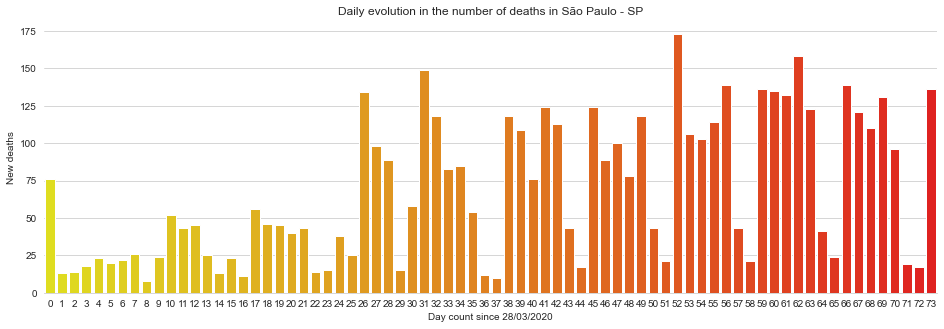

In [14]:
deaths_per_day('São Paulo - SP')

<p>
    In the city of <b>São Paulo</b> it is possible to see a pattern in which reported deaths deacrease close to the weekend and increase over the rest of the week. But it is also clear that, after a period of a certain stability, death peaks show an upward trend.
</p>

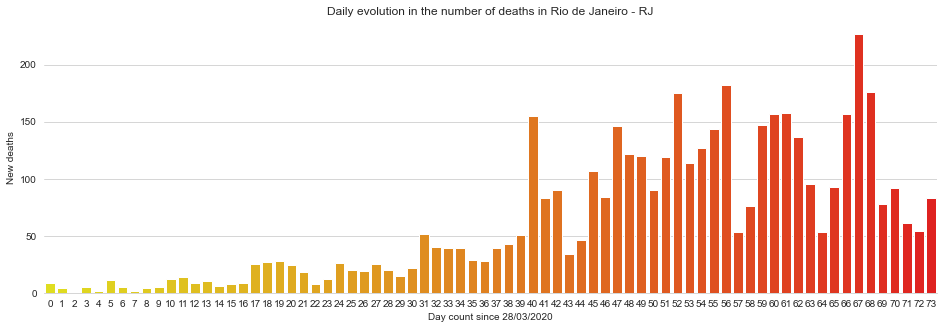

In [15]:
deaths_per_day('Rio de Janeiro - RJ')

<p>
    There seems to be an upward trend in the number of deaths in the city of <b>Rio de Janeiro</b>, even more consistant than in the city of São Paulo where the death's increase evolves in a smoother pace. Apparently, the second month recorded in the data represents a solid increase in the number of deaths in Rio de Janeiro.
</p>

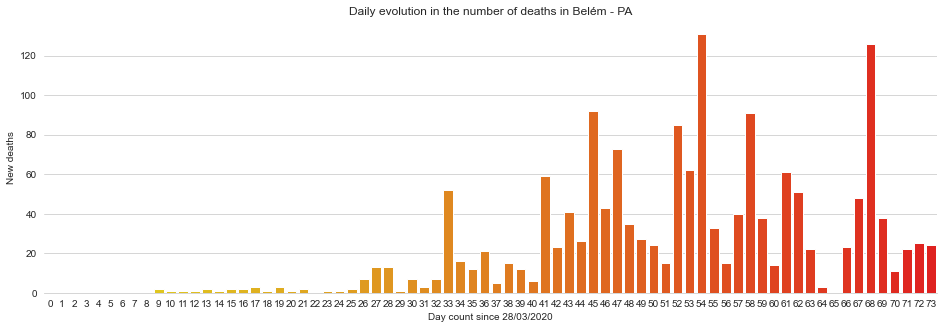

In [16]:
deaths_per_day('Belém - PA')

<p>
    In <b>Belém</b> it is possible to observe greater peaks over the the past weeks, indicating that the local situation is still getting worse.
</p>

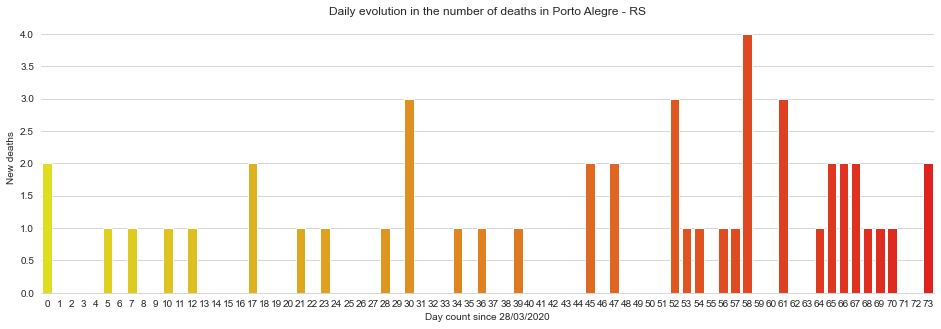

In [17]:
deaths_per_day('Porto Alegre - RS')

<p>
    As seen before, <b>Porto Alegre</b> is in a better situation in comparison to other capitals over the country. Still, the gap of days with no deaths reported has deacreased in the last days, while the deaths' peaks present an upward trend.
</p>

<h2 id = model>4- Creating a model to predict the number of deaths caused by Covid-19</h2>

<p>
    For this predictive model, the attempt is to predict the number of deaths only through the date, that is, date is going to be the only predictive variable, since we will be creating separeted models for each city of interest. Thus, the target variable, which value we want to predict, is the number of total deaths until the requested date.
</p>
<p>
    80% of the data set will be used to train our model and the remaining 20% will be used to evaluate the model's performance in predicting the correct number of deaths, given a comparison metric.
</p>

<p>
    In the sequence, to facilitate the models' creation for the different cities of interest, functions will be created:
</p>

In [18]:
# Creating function to filter city and columns of interest from de data set:
def city_filter(city_name):
    """It filters the dataset - at this point, covid_cap_br - with the target city and columns of interest.
    
    Args:
    city_name: string type indicanting the target city. Dataset convention is 'City - UF'.
    
    Returns:
    filt_data: filtered dataset.
    """
    filt_data = covid_cap_br[covid_cap_br['city'] == city_name]
    filt_data = filt_data[['day_count', 'deaths']]
    return filt_data

# Creating function to plot a graphic that shows the evolution on the weekly total number of deaths:
def deaths_evolution(city_data, city_name):
    """It creates a bar plot representing the weekly total number of deaths.
    
    Args:
    city_data: filtered dataset returned by city_filter();
    city_name: string type indicanting the city name to be shown in the graphic.
    
    Returns:
    None
    """
    sns.barplot(x = 'day_count', y = 'deaths', data = city_data[city_data['day_count'] % 7 == 0], palette = "Wistia").set(
        xlabel = 'Death count from ' + min_date,
        ylabel = 'Deaths',
        title = 'Evolution in the number of deaths in ' + city_name)
    sns.set_style("whitegrid")
    sns.despine(left=True)

In [19]:
# Creating a function that develops, trains e evaluates the predictive model:
def covid_poly_model(city_data, n_degree, seed):
    """It apllies polynomial transformation on data, split it into train and test sets, creates a linear regression model
    and evaluates the model along with a plot presentation that ilustrates model's prediction over original data.
    
    Args:
    city_data: filtered dataset returned by city_filter();
    n_degree: integer type representing the polynomial transformation's degree to be applied;
    seed: integer type allowing the reproduction of the results.
    
    Returns:
    poly_regr: polynomial transformation's model;
    model: trained linear regression model used to make future predictions.
    """
    # Separating variables:
    X = city_data[['day_count']]
    Y = city_data[['deaths']]
    
    # Splitting data into train and test sets through date:
    limit_index = int(0.8*len(X.index))
    X_train = X.iloc[0:limit_index]
    X_test = X.iloc[limit_index:]
    
    Y_train = Y.iloc[0:limit_index]
    Y_test = Y.iloc[limit_index:]
    
    # Applying polynomial transformation:
    poly_regr = PolynomialFeatures(degree = n_degree)
    X_poly_train = poly_regr.fit_transform(X_train)
    X_poly_test = poly_regr.transform(X_test)
    X_poly = poly_regr.transform(X)
    
    # Creating the regression model:
    model = LinearRegression()
    
    # Training the model:
    model.fit(X_poly_train, Y_train)
    
    # Predictions for test set:
    Y_pred = model.predict(X_poly_test)
    
    # Evaluating the model through MAE (mean absolut error):
    mae = round(mean_absolute_error(Y_test, Y_pred))
    
    sns.scatterplot(x = 'day_count', y = 'deaths', data = city_data).set(
        xlabel = 'Day count since ' + min_date,
        ylabel = 'Deaths',
        title = 'Deaths Evolution x Polynomial Regr. - Degree ' + str(n_degree))
    plt.plot(X, model.predict(X_poly), color = 'r')
    plt.show()
    
    print('The mean absolut error for the predicted number of deaths with a polynomial regression of degree ' +
          str(n_degree) + ' is: ' + str(mae) + '.')
 
    return poly_regr, model

<p>
    In the sequence, the functions defined above will be used to create a regression model for the cities of interest. As it can be seen, the algorithms used are <b>LinearRegression</b> along with <b>PolynomialFeatures</b>, both from Scikit-Learn package.
</p>
<p>
    For this study, the target cities are <b>São Paulo</b>, <b>Rio de Janeiro</b>, <b>Belém</b> e <b>Porto Alegre</b>.
</p>

<h3 id = spmodel>São Paulo - SP</h3>

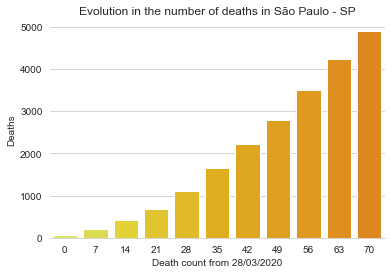

In [20]:
# Filtering data for the city of São Paulo:
covid_sp = city_filter('São Paulo - SP')

# Evaluating deaths' evolution in São Paulo:
deaths_evolution(covid_sp, 'São Paulo - SP')

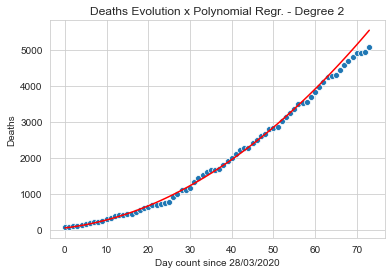

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 2 is: 192.0.


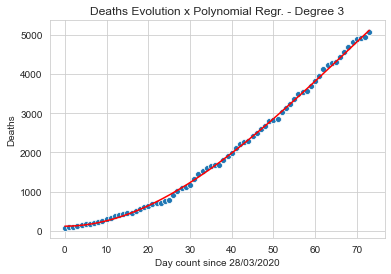

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 3 is: 56.0.


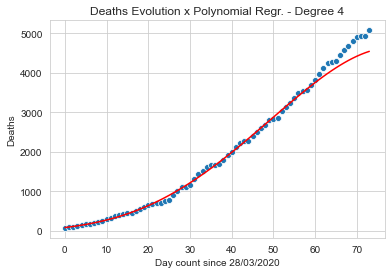

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 4 is: 293.0.


In [21]:
# Creating and evaluating the regression models for São Paulo:
sp_poly_regr_2, sp_model_2 = covid_poly_model(covid_sp, n_degree = 2, seed = 300)

sp_poly_regr_3, sp_model_3 = covid_poly_model(covid_sp, n_degree = 3, seed = 300)

sp_poly_regr_4, sp_model_4 = covid_poly_model(covid_sp, n_degree = 4, seed = 300)

<p>
    The growth of deaths, as expected, is not linear in the city of <b>São Paulo</b>. The same trend is expected in the other target cities and that is why the models were created applying the polynomial transformation to the data. 
</p>
<p>
    The <i>mean absolut error</i> is very different among the three models created for different polynomial degrees.However, observing the red curve representing the created regression, the one that best fits the latest days growth's trend is the one related to the degree 3, with this being chosen as the best option to predict future deaths for the following days:
</p>

In [22]:
sp_poly_regr = sp_poly_regr_3
sp_model = sp_model_3

<p>
    Next step, the same procedure will be reproduced for the other target cities:
</p>

<h3 id = rjmodel>Rio de Janeiro - RJ</h3>

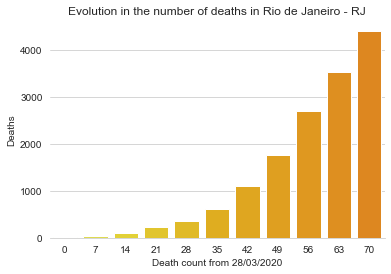

In [23]:
# Filtering data for the city of Rio de Janeiro:
covid_rj = city_filter('Rio de Janeiro - RJ')

# Evaluating deaths' evolution in Rio de Janeiro:
deaths_evolution(covid_rj, 'Rio de Janeiro - RJ')

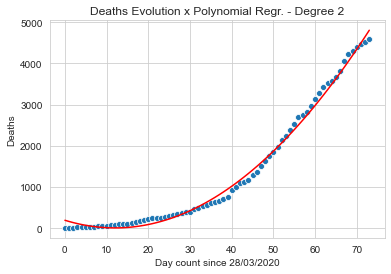

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 2 is: 126.0.


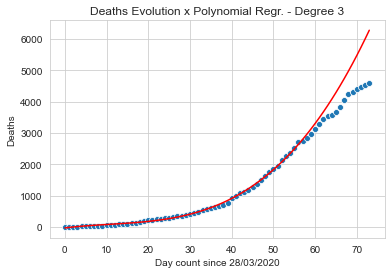

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 3 is: 711.0.


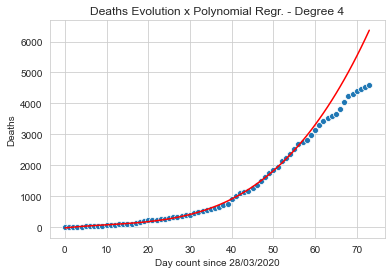

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 4 is: 753.0.


In [24]:
# Creating and evaluating the regression models for Rio de Janeiro:
rj_poly_regr_2, rj_model_2 = covid_poly_model(covid_rj, n_degree = 2, seed = 301)

rj_poly_regr_3, rj_model_3 = covid_poly_model(covid_rj, n_degree = 3, seed = 301)

rj_poly_regr_4, rj_model_4 = covid_poly_model(covid_rj, n_degree = 4, seed = 301)

<p>
    The polynomial regression with degree 2 is the one with the lowest <i>mean absolute error</i> and, because of that, this will be the chosen model to give us the predictions.
</p>

In [25]:
rj_poly_regr = rj_poly_regr_2
rj_model = rj_model_2

<h3 id = blmodel>Belém - PA</h3>

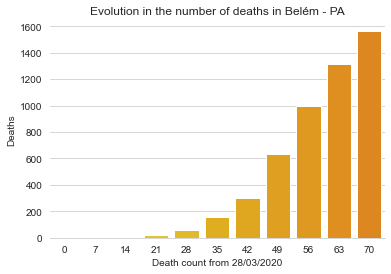

In [26]:
# Filtering data for the city of Belém:
covid_bl = city_filter('Belém - PA')

# Evaluating deaths' evolution in Belém:
deaths_evolution(covid_bl, 'Belém - PA')

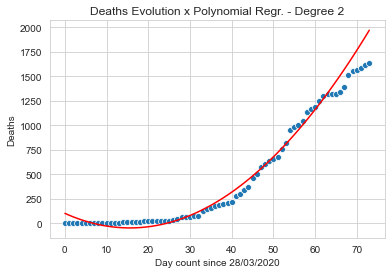

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 2 is: 134.0.


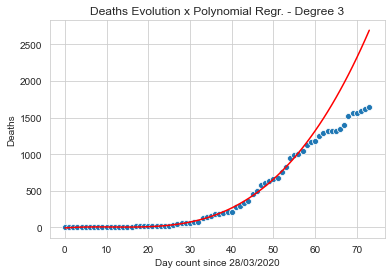

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 3 is: 503.0.


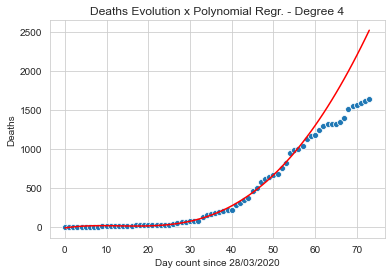

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 4 is: 428.0.


In [27]:
# Creating and evaluating the regression models for Belém:
bl_poly_regr_2, bl_model_2 = covid_poly_model(covid_bl, n_degree = 2, seed = 302)

bl_poly_regr_3, bl_model_3 = covid_poly_model(covid_bl, n_degree = 3, seed = 302)

bl_poly_regr_4, bl_model_4 = covid_poly_model(covid_bl, n_degree = 4, seed = 302)

<p>
    Following the same criteria, observing the red curves and the <i>mean absolute error</i> evaluation, we can observe that, even with the error being high, the regression model related to the degree 2 is the one with the lowest error and will be used to predict deaths for the following days in Belém:
</p>

In [28]:
bl_poly_regr = bl_poly_regr_2
bl_model = bl_model_2

<h3 id = pamodel>Porto Alegre - RS</h3>

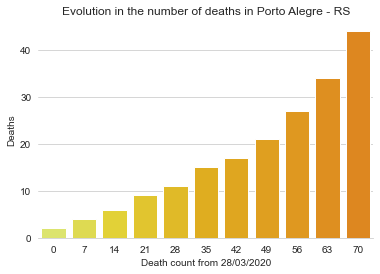

In [29]:
# Filtering data for the city of Porto Alegre:
covid_pa = city_filter('Porto Alegre - RS')

# Evaluating deaths' evolution in Porto Alegre:
deaths_evolution(covid_pa, 'Porto Alegre - RS')

<p>
    Among the cities we studied along in this project, <b>Porto Alegre</b> seems to present a deaths' growth closer to a linear profile. Yet, we are going to use a polynomial regression to better represent the evolution of deaths caused by Covid-19 in the city.
</p>

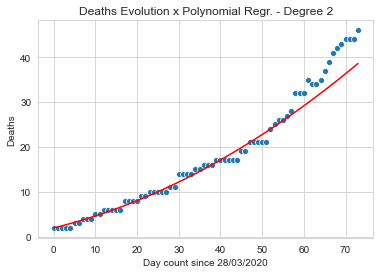

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 2 is: 5.0.


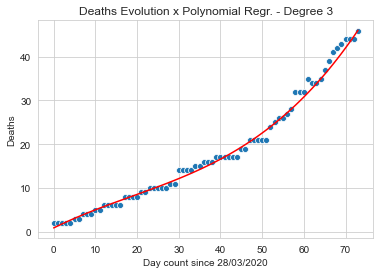

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 3 is: 1.0.


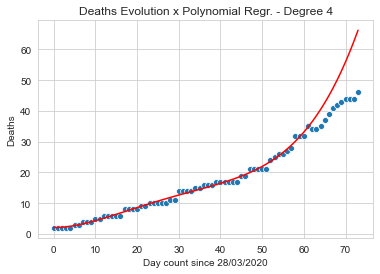

The mean absolut error for the predicted number of deaths with a polynomial regression of degree 4 is: 8.0.


In [30]:
# Creating and evaluating the regression models for Porto Alegre:
pa_poly_regr_2, pa_model_2 = covid_poly_model(covid_pa, n_degree = 2, seed = 303)

pa_poly_regr_3, pa_model_3 = covid_poly_model(covid_pa, n_degree = 3, seed = 303)

pa_poly_regr_4, pa_model_4 = covid_poly_model(covid_pa, n_degree = 4, seed = 303)

<p>
    The model with degree 3 seems to better fit the curve especially in the later days and is the one with the lowest mean absolute error:
</p>

In [31]:
pa_poly_regr = pa_poly_regr_3
pa_model = pa_model_3

<p>
    In the sequence, we are going to use the chosen models above to predict the total number of deaths accounted for in future days.
</p>
<p>
    <b>Important</b>: it is worth emphasizing once again that the only predictable variable used in this study is the date of reference, being that in real life other factors directly affect the number of deaths, such as the number of hospital beds available, the social profile of the population, the rate of adherence to social distance, measures taken by the local government and many others, are not being directly considered. Thus, this projection of deaths is not sensitive to possible changes in these factors that define the evolution of the disease in each of the studied cities.
</p>

<h2 id = pred>5- Death's Prediction caused by Covid-19</h2>

In [32]:
# Loading file with future target dates and applying the requested transformations:
pred_df = pd.read_csv('covid_predict.csv', parse_dates = ['date'])
pred_df['day_count'] = (pred_df['date'] - min(covid_cap_br['date']))
pred_df['day_count']

0   75 days
1   76 days
Name: day_count, dtype: timedelta64[ns]

In [33]:
# Changing day count to integer type:
pred_df['day_count'] = pd.to_numeric(pred_df['day_count'].dt.days, downcast='integer')

In [34]:
# Creating a function that automates the prediction of deaths:
def make_prediction(model, poly_regr, cidade):
    """It applies the polynomial regression model and the trained model developed before to make the predictions.
    
    Args:
    model: linear regression model returned by the covid_poly_model() function;
    poly_regr: polynomial transformation model returned by the covid_poly_model() function;
    cidade: string type representing the target city.
    
    Returns:
    None.
    """
    Y_predicted = model.predict(poly_regr.fit_transform([[pred_df['day_count'][0]], [pred_df['day_count'][1]]]))
    
    print('Until ' + pred_df['date'][0].strftime('%d/%m/%Y') + ', in the city of ' + cidade + ', the prediction is ' +
      str(round(int(Y_predicted[0]))) + ' total deaths by Covid-19.')
    
    print('Until ' + pred_df['date'][1].strftime('%d/%m/%Y') + ', in the city of ' + cidade + ', the prediction is ' +
      str(round(int(Y_predicted[1]))) + ' total deaths by Covid-19.')

<h3 id = sppred>Predicting deaths in São Paulo - SP</h3>

In [35]:
# Making predictions for São Paulo:
make_prediction(sp_model, sp_poly_regr, 'São Paulo - SP')

Until 11/06/2020, in the city of São Paulo - SP, the prediction is 5313 total deaths by Covid-19.
Until 12/06/2020, in the city of São Paulo - SP, the prediction is 5413 total deaths by Covid-19.


<h3 id = rjpred>Predicting deaths in Rio de Janeiro - RJ</h3>

In [36]:
# Making predictions for Rio de Janeiro:
make_prediction(rj_model, rj_poly_regr, 'Rio de Janeiro - RJ')

Until 11/06/2020, in the city of Rio de Janeiro - RJ, the prediction is 5126 total deaths by Covid-19.
Until 12/06/2020, in the city of Rio de Janeiro - RJ, the prediction is 5290 total deaths by Covid-19.


<h3 id = blpred>Predicting deaths in Belém - PA</h3>

In [37]:
# Making predictions for Belém:
make_prediction(bl_model, bl_poly_regr, 'Belém - PA')

Until 11/06/2020, in the city of Belém - PA, the prediction is 2112 total deaths by Covid-19.
Until 12/06/2020, in the city of Belém - PA, the prediction is 2186 total deaths by Covid-19.


<h3 id = papred>Predicting deaths in Porto Alegre - RS</h3>

In [38]:
# Making predictions for Porto Alegre:
make_prediction(pa_model, pa_poly_regr, 'Porto Alegre - RS')

Until 11/06/2020, in the city of Porto Alegre - RS, the prediction is 48 total deaths by Covid-19.
Until 12/06/2020, in the city of Porto Alegre - RS, the prediction is 50 total deaths by Covid-19.


<h2 id = conc>6- Conclusion</h2>

<p>
    The cities studied in this project show different profiles in terms of the evolution in the number of deaths and the variability of daily deaths notification doesn't allow to predict the number of deaths in the following days with expected accuracy. However, as a big picture, it is possible to see there is a growing trend of deaths even in the cities that seem to be in a more comfortable situation. It's not possible to say that the country, in general, has reached its disease's peak, however, it can be said that the country has definitely not entered the phase of reducing confirmed cases and deaths.
</p>
<p>
    With that being said, we can only continue to follow recommendations established by the responsible technical organizations that recommend social distance, constant hand hygiene, the use of protective masks, among others.
</p>

### The end.